### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측 
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
   지니지수는 얼마나 불확실한가(얼마나 많은 것들이 섞여 있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여 있다는 의미.
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

https://injo.tistory.com/15


In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

dt_clf = DecisionTreeClassifier(random_state=156)
# pruning(가지치기) : 마지막 leaf 노드들이 root 노드까지 가는데 걸리는 조건의 개수인 깊이를 제한
# dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=4,random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=4,random_state=156)
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X_train,X_test,y_train,y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
clf_report = classification_report(y_test,pred)

print(f'결정트리예측정확도 : {accuracy:.4f}')
print(f'classification_report :\n {clf_report}')

결정트리예측정확도 : 0.9333
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91        10
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



## 시각화

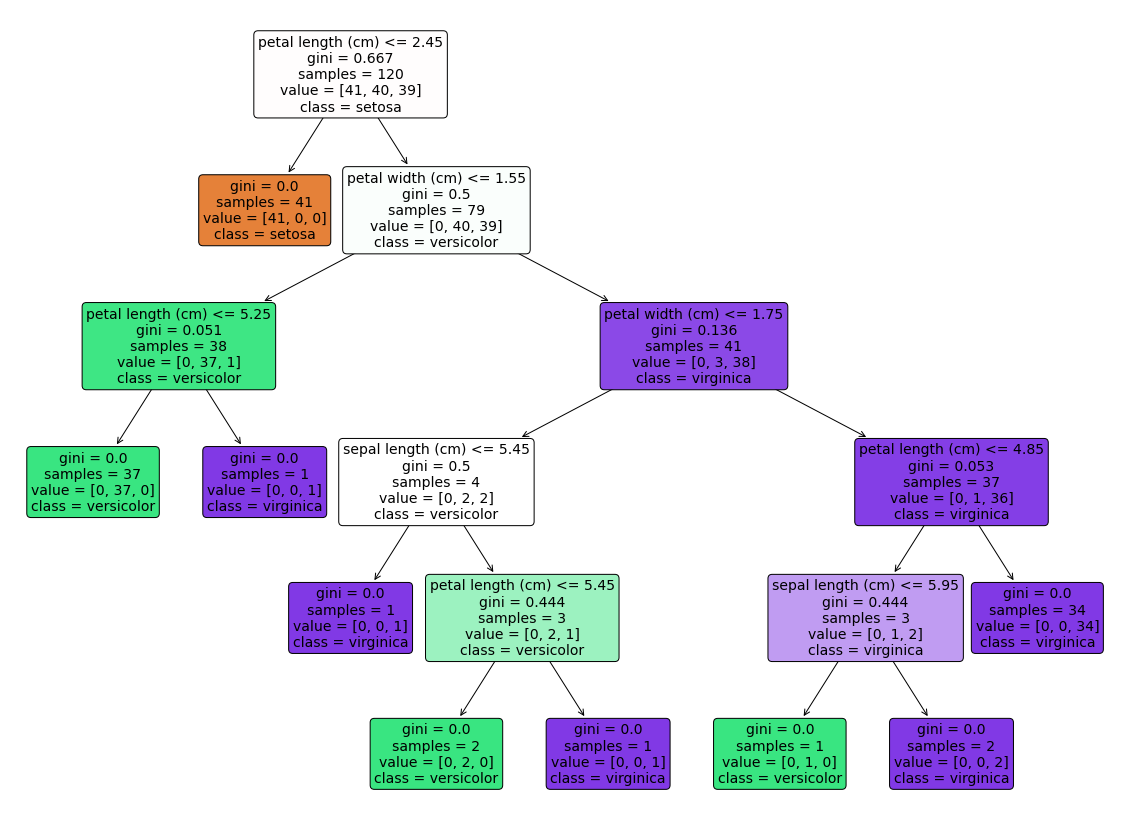

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf,filled=True,
              feature_names=iris_data.feature_names,
              class_names=iris_data.target_names,
              rounded=True,fontsize=14)
plt.show()


In [4]:
!pip install graphviz
#환경변수 설정 path
#https://free-eunb.tistory.com/14

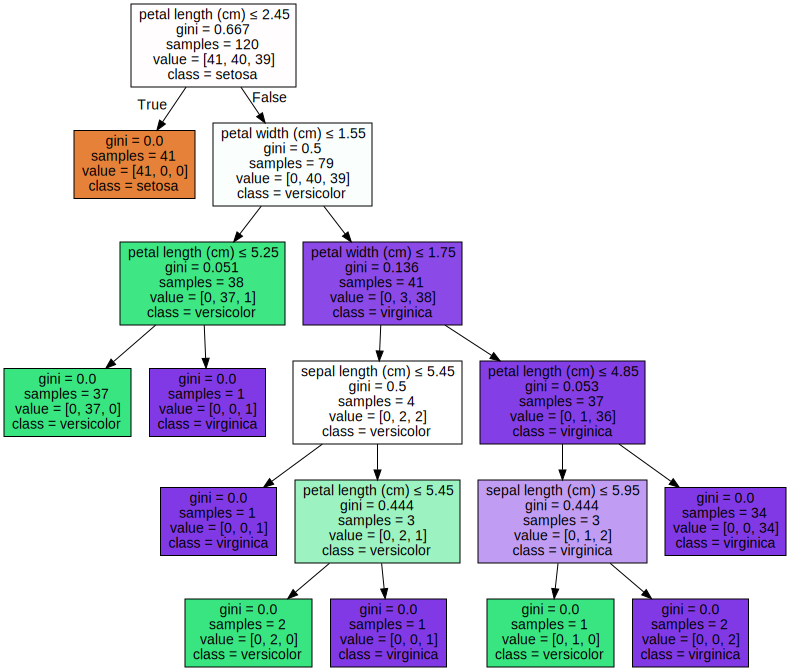

In [4]:
import graphviz
dot_data = tree.export_graphviz(dt_clf,
                               out_file=None,
                                feature_names=iris_data.feature_names,
                                class_names=iris_data.target_names,
                                filled=True,
                                special_characters=True)
graphviz.Source(dot_data)

## Feature Importance

Feture importances: 
 [0.025 0.    0.555 0.42 ] 

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

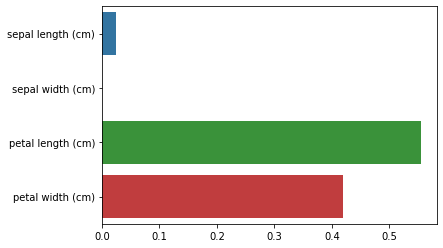

In [17]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print(f'Feture importances: \n {np.round(dt_clf.feature_importances_,3)}','\n')

# feature importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')

# feature importance를 column별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# 결정 트리 실습 - Human Activity Recognition

# [과제]
'dataset/human_activity' 폴더의 데이터들을 불러와서 다음을 수행하세요.
- 학습용 평가용 데이터셋 추출
- dt로 분류모델 생성 및 정확도 평가
- 하이퍼 파라미터로  'max_depth' : [4, 8, 12, 16 ,20]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 추가 하이퍼 파라미터로 'min_samples_split' : [16,24]를 적용하여 최적 하이퍼 파라미터를 구하고 정확도 평가
- 중요 특성 시각화


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
feature_name_df = pd.read_csv('dataset/human_activity/features.txt', sep='\s+',header=None,names=['columns_index','column_name'])
feature_name =feature_name_df.iloc[:,1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [11]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                 columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index() 
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                             'dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1])
                                                                              if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [12]:
def get_human_dataset():
    feature_name_df = pd.read_csv('dataset/human_activity/features.txt', sep='\s+', header=None, \
                              names = ['column_index','column_name'])
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('dataset/human_activity/train/X_train.txt', sep='\s+', header=None)
    X_train.columns = feature_name
    X_test = pd.read_csv('dataset/human_activity/test/X_test.txt', sep='\s+', header=None)
    X_test.columns = feature_name
    
    y_train = pd.read_csv('dataset/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('dataset/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
X_train

In [17]:
from sklearn.metrics import accuracy_score 
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("결정트리 정확도 : ",accuracy)
print("기본 하이퍼 파라미터 :\n",dt_clf.get_params())

결정트리 정확도 :  0.8547675602307431
기본 하이퍼 파라미터 :
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [18]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[6,8,10,12,16,20,24]}
grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print("GridSearchCV 정확도 :",grid_cv.best_score_)
print("GridSearchCV 최적파라미터 :",grid_cv.best_params_)
#테스트 수정 보완

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 정확도 : 0.8513444970102249
GridSearchCV 최적파라미터 : {'max_depth': 16}


In [19]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.152338,0.013522,0.005386,7.980825e-04,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,1.460818,0.030468,0.005585,1.016709e-03,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,1.713546,0.040963,0.005785,1.164209e-03,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,1.915703,0.084394,0.006782,7.462130e-04,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,2.148787,0.151701,0.004987,2.431402e-07,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
5,2.184790,0.207245,0.005386,4.888114e-04,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,4
6,2.182300,0.185408,0.005984,8.923901e-04,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,6


In [20]:
max_depths=[6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth , random_state=156)
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print(f'max_depths = {depth} 정확도 : {accuracy}')

max_depths = 6 정확도 : 0.8557855446216491
max_depths = 8 정확도 : 0.8707159823549372
max_depths = 10 정확도 : 0.8673227010519172
max_depths = 12 정확도 : 0.8646080760095012
max_depths = 16 정확도 : 0.8574821852731591
max_depths = 20 정확도 : 0.8547675602307431
max_depths = 24 정확도 : 0.8547675602307431


In [21]:
params = {'max_depth':[6,8,10,12,16,20,24],'min_samples_split':[16,24]}
grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print("GridSearchCV 정확도 :",grid_cv.best_score_)
print("GridSearchCV 최적파라미터 :",grid_cv.best_params_)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
GridSearchCV 정확도 : 0.8548794147162603
GridSearchCV 최적파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [23]:
best_df_clf=grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print("결정트리 예측도 : ",accuracy)

결정트리 예측도 :  0.8717339667458432


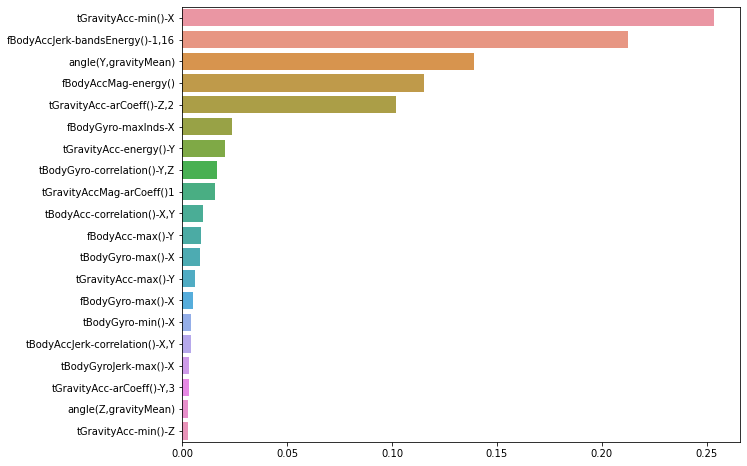

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
ftr_importances_values = best_df_clf.feature_importances_

ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(10,8),)
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [ ]:
#top 10 만 추출후 트리 그려보기